In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from networkx.algorithms.community import greedy_modularity_communities
import os
import scipy.io as sio

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VAR
import networkx as nx

In [ ]:
def label_mapping(valence, arousal):
    # HVHA, HVLA, LVHA, and LVLA

    if (valence > 5 and arousal > 5):
        label = 0
    elif (valence > 5 and arousal <= 5):
        label = 1
    elif (valence <= 5 and arousal > 5):
        label = 2
    elif (valence <= 5 and arousal <= 5):
        label = 3

    return label

In [ ]:
def map_label(label):
    new_label = label_mapping(label[0], label[1])
    return new_label

In [ ]:
_,_, files = next(os.walk(r'C:\Users\tarun\Documents\College\Mini_Proj\DENS\Emotional'))
files

['AddressInHost.txt',
 'Adventorous_mit004Trial-4Click-3.mat',
 'Adventorous_mit022Trial-7Click-15.mat',
 'Adventorous_mit022Trial-7Click-16.mat',
 'Adventorous_mit024Trial-9Click-4.mat',
 'Adventorous_mit024Trial-9Click-5.mat',
 'Adventorous_mit035Trial-11Click-17.mat',
 'Adventorous_mit035Trial-11Click-19.mat',
 'Adventorous_mit061Trial-3Click-3.mat',
 'Adventorous_mit072Trial-10Click-27.mat',
 'Adventorous_mit072Trial-10Click-29.mat',
 'Adventorous_mit072Trial-1Click-1.mat',
 'Adventorous_mit072Trial-1Click-3.mat',
 'Adventorous_mit074Trial-5Click-4.mat',
 'Adventorous_mit074Trial-5Click-5.mat',
 'Adventorous_mit097Trial-1Click-1.mat',
 'Adventorous_mit104Trial-9Click-4.mat',
 'Adventorous_mit107Trial-6Click-3.mat',
 'Adventorous_mit111Trial-6Click-4.mat',
 'Adventorous_mit114Trial-10Click-31.mat',
 'Adventorous_mitb2017007Trial-7Click-4.mat',
 'Afraid_mit003Trial-6Click-2.mat',
 'Afraid_mit022Trial-4Click-9.mat',
 'Afraid_mit022Trial-6Click-12.mat',
 'Afraid_mit022Trial-6Click-13.m

In [ ]:
eeg_data = []
eeg_label = []

In [ ]:
rating = pd.read_excel(r"C:\Users\tarun\Documents\College\Mini_Proj\DENS\wholeFrequencyDependentDataWithVADLFR_ReFormattingWholeFrequencyVA.xlsx", engine='openpyxl')

In [ ]:
base_path = r"C:\Users\tarun\Documents\College\Mini_Proj\DENS\Emotional\\"
for f in files:
  if f.endswith(".mat"):
    file_str = f[:-4]
    df = rating[rating["Subject"].str.contains(file_str)]
    if df.empty:
        print(f)
    if not df.empty:
      path = base_path + f
      mat = sio.loadmat(path)
      data = mat.get('eegData')
      data = data.transpose()
      eeg_data.append(data)
      df = df[['Subject','valence','arousal']]
      df = df.drop_duplicates()
      valence = df['valence']
      arousal = df['arousal']
      lab = label_mapping(valence.values[0], arousal.values[0])
      eeg_label.append(lab)

Calm_mit014Trial-1Click-1.mat
Calm_mit017Trial-1Click-1.mat
Calm_mit017Trial-3Click-3.mat
Compassionate_mit096Trial-5Click-3.mat
Compassionate_mit096Trial-5Click-4.mat
Compassionate_mit114Trial-4Click-10.mat
Distrustful_mit082Trial-5Click-13.mat
Distrustful_mitb2017007Trial-11Click-8.mat
Frustrated_mit017Trial-4Click-7.mat
Frustrated_mit022Trial-2Click-4.mat
Frustrated_mit022Trial-6Click-14.mat
Frustrated_mit023Trial-6Click-7.mat
Frustrated_mit054Trial-10Click-7.mat
Frustrated_mit079Trial-2Click-4.mat
Frustrated_mit080Trial-7Click-6.mat
Frustrated_mit082Trial-5Click-10.mat
Hopeful_mit114Trial-1Click-1.mat
Love_mit096Trial-2Click-1.mat
Love_mit114Trial-5Click-12.mat
Pensive_mit014Trial-1Click-2.mat
Pensive_mit014Trial-1Click-3.mat
Pensive_mit116Trial-2Click-1.mat
Pensive_mit116Trial-2Click-2.mat
Pleased_mit097Trial-11Click-9.mat
Relaxed_mit023Trial-2Click-1.mat
Triumphant_mit023Trial-10Click-9.mat
Triumphant_mit079Trial-3Click-8.mat
Triumphant_mit113Trial-8Click-4.mat


In [ ]:
eeg_data = np.array(eeg_data)

In [ ]:
eeg_data.shape

(465, 1751, 128)

In [ ]:
from numpy import save
save('data_DENS.npy', eeg_data)

In [ ]:
# load numpy array from npy file
from numpy import load
# load array
data = load(r"C:\Users\tarun\Documents\College\Mini_Proj\data_DENS.npy",allow_pickle=True)

In [ ]:
data.shape

(465, 1751, 128)

In [ ]:
# Granger Causality function

def grangerCausality(data,kk, k, l, lag_order):
    testarray = data[kk,:, [k, l]]
    testarray = np.array(testarray)
    testarray = np.transpose(testarray)
    granger_test = grangercausalitytests(testarray[:, 1::-1], lag_order, verbose=False)
    pval = granger_test[lag_order][0]['ssr_ftest'][1]
    stats_val = granger_test[lag_order][0]['ssr_ftest'][0]
    return (pval, stats_val)


In [ ]:
final_list = []
for k in range(0,465):
  relation_list = []
  for i in range(0, 128):
    for j in range(0, 128):
      if i != j:
        local = []
        local2 = []
        testarray = data[k,:,[i,j]]
        testarray = np.array(testarray)
        testarray = np.transpose(testarray)
        # print(testarray.shape)
        model = VAR(testarray)
        results = model.fit()
        lag_order = results.k_ar
        # print(lag_order)
        pval, stats_val = grangerCausality(data,k, i, j, lag_order)
        if pval < 0.05:
          local.append(i)
          local.append(j)
          local.append(stats_val)
        if local:
          relation_list.append(local)
  final_list.append(relation_list)



In [ ]:
from numpy import save
save('granger_dens.npy', final_list)

In [ ]:
# load numpy array from npy file
from numpy import load
# load array
data1 = load(r"C:\Users\tarun\Documents\College\Mini_Proj\granger_dens.npy",allow_pickle=True)
# print the array
print(len(data1))
print(len(data1[0]))
print(len(data1[1]))
print(len(data1[2]))

465
3436
10756
8696


      channel1  channel2  statsvalue
344          3         4  190.082981
227          2         4  177.099894
348          3        10  163.244141
7989       117         4  159.052325
933          9         4  157.810891


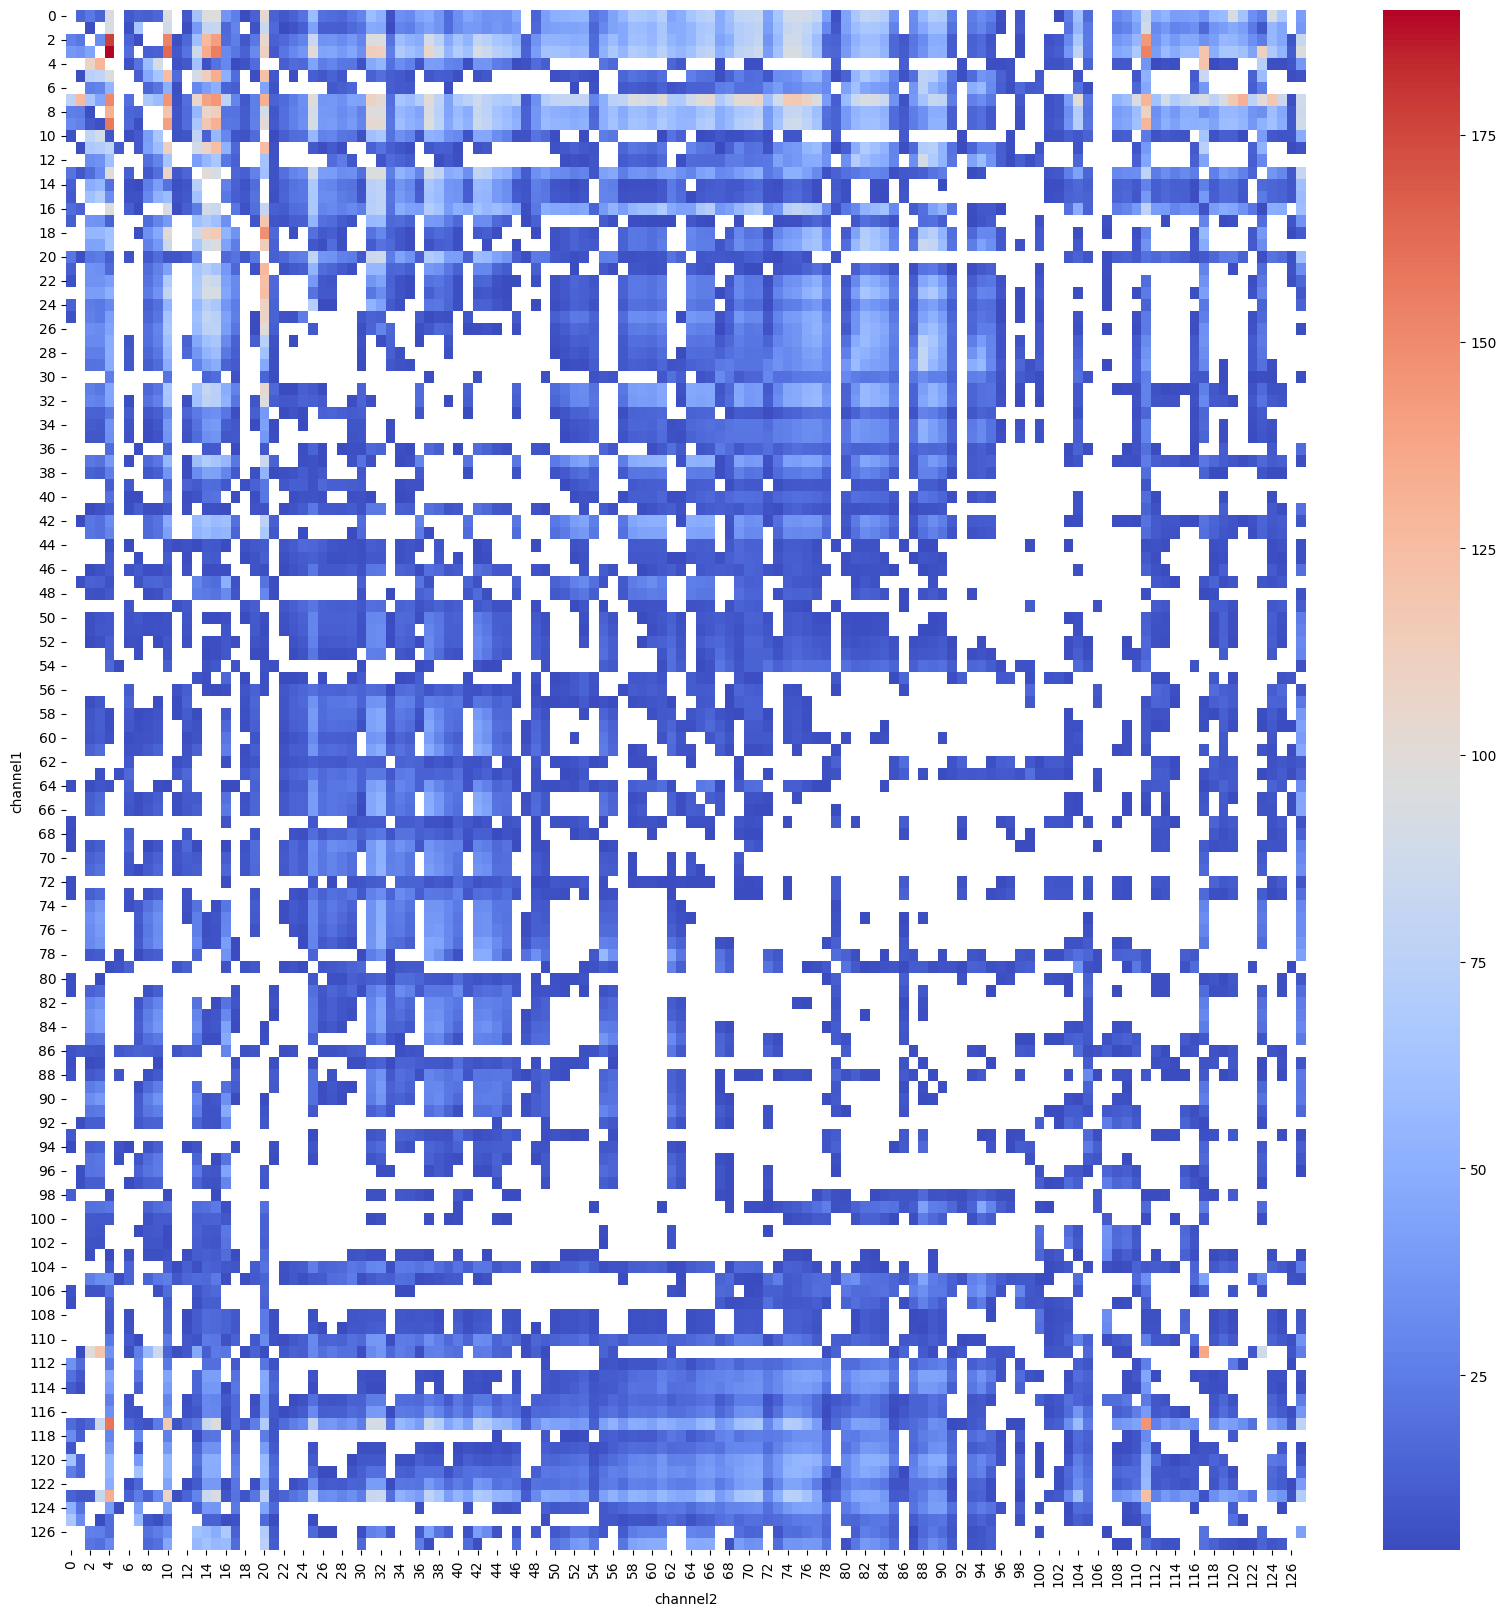

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
df = pd.DataFrame(data1[170])
df.columns = ["channel1","channel2","statsvalue"]
df = df.sort_values(by="statsvalue",ascending=False)
print(df.head(5))
# Pivot the DataFrame to create a 2D table with x values as rows and y values as columns
heatmap_data = pd.pivot_table(df, values='statsvalue', index=['channel1'], columns='channel2')

# Set the color map for the heatmap
cmap = "coolwarm"

# Set NaN for cells where x and y values are not found in dataframe
for i in range(128):
    for j in range(128):
        if (i not in heatmap_data.index) or (j not in heatmap_data.columns):
            heatmap_data.loc[i,j] = None

# Create the heatmap
sns.heatmap(heatmap_data, cmap=cmap, cbar=True)

# Show the plot
plt.show()

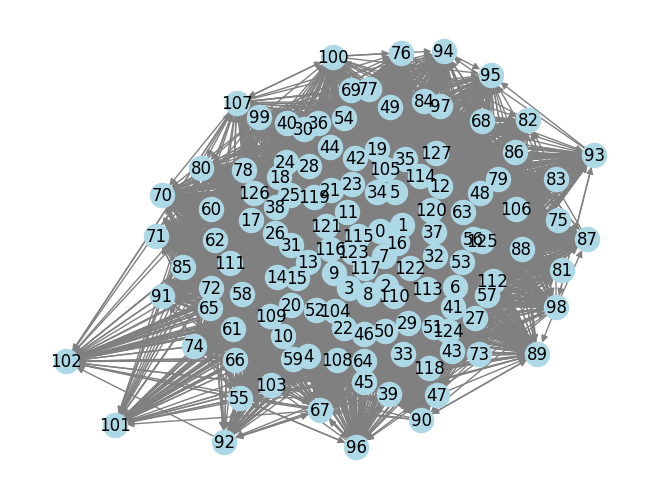

In [ ]:
# Create graph
import networkx as nx

G = nx.DiGraph()
lebn = len(data1[170])
for i in range(0,lebn):
    G.add_edge(data1[170][i][0], data1[170][i][1])

pos = nx.spring_layout(G)
# pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', arrows=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')

plt.show()
# 61 x 3 (61 edges)

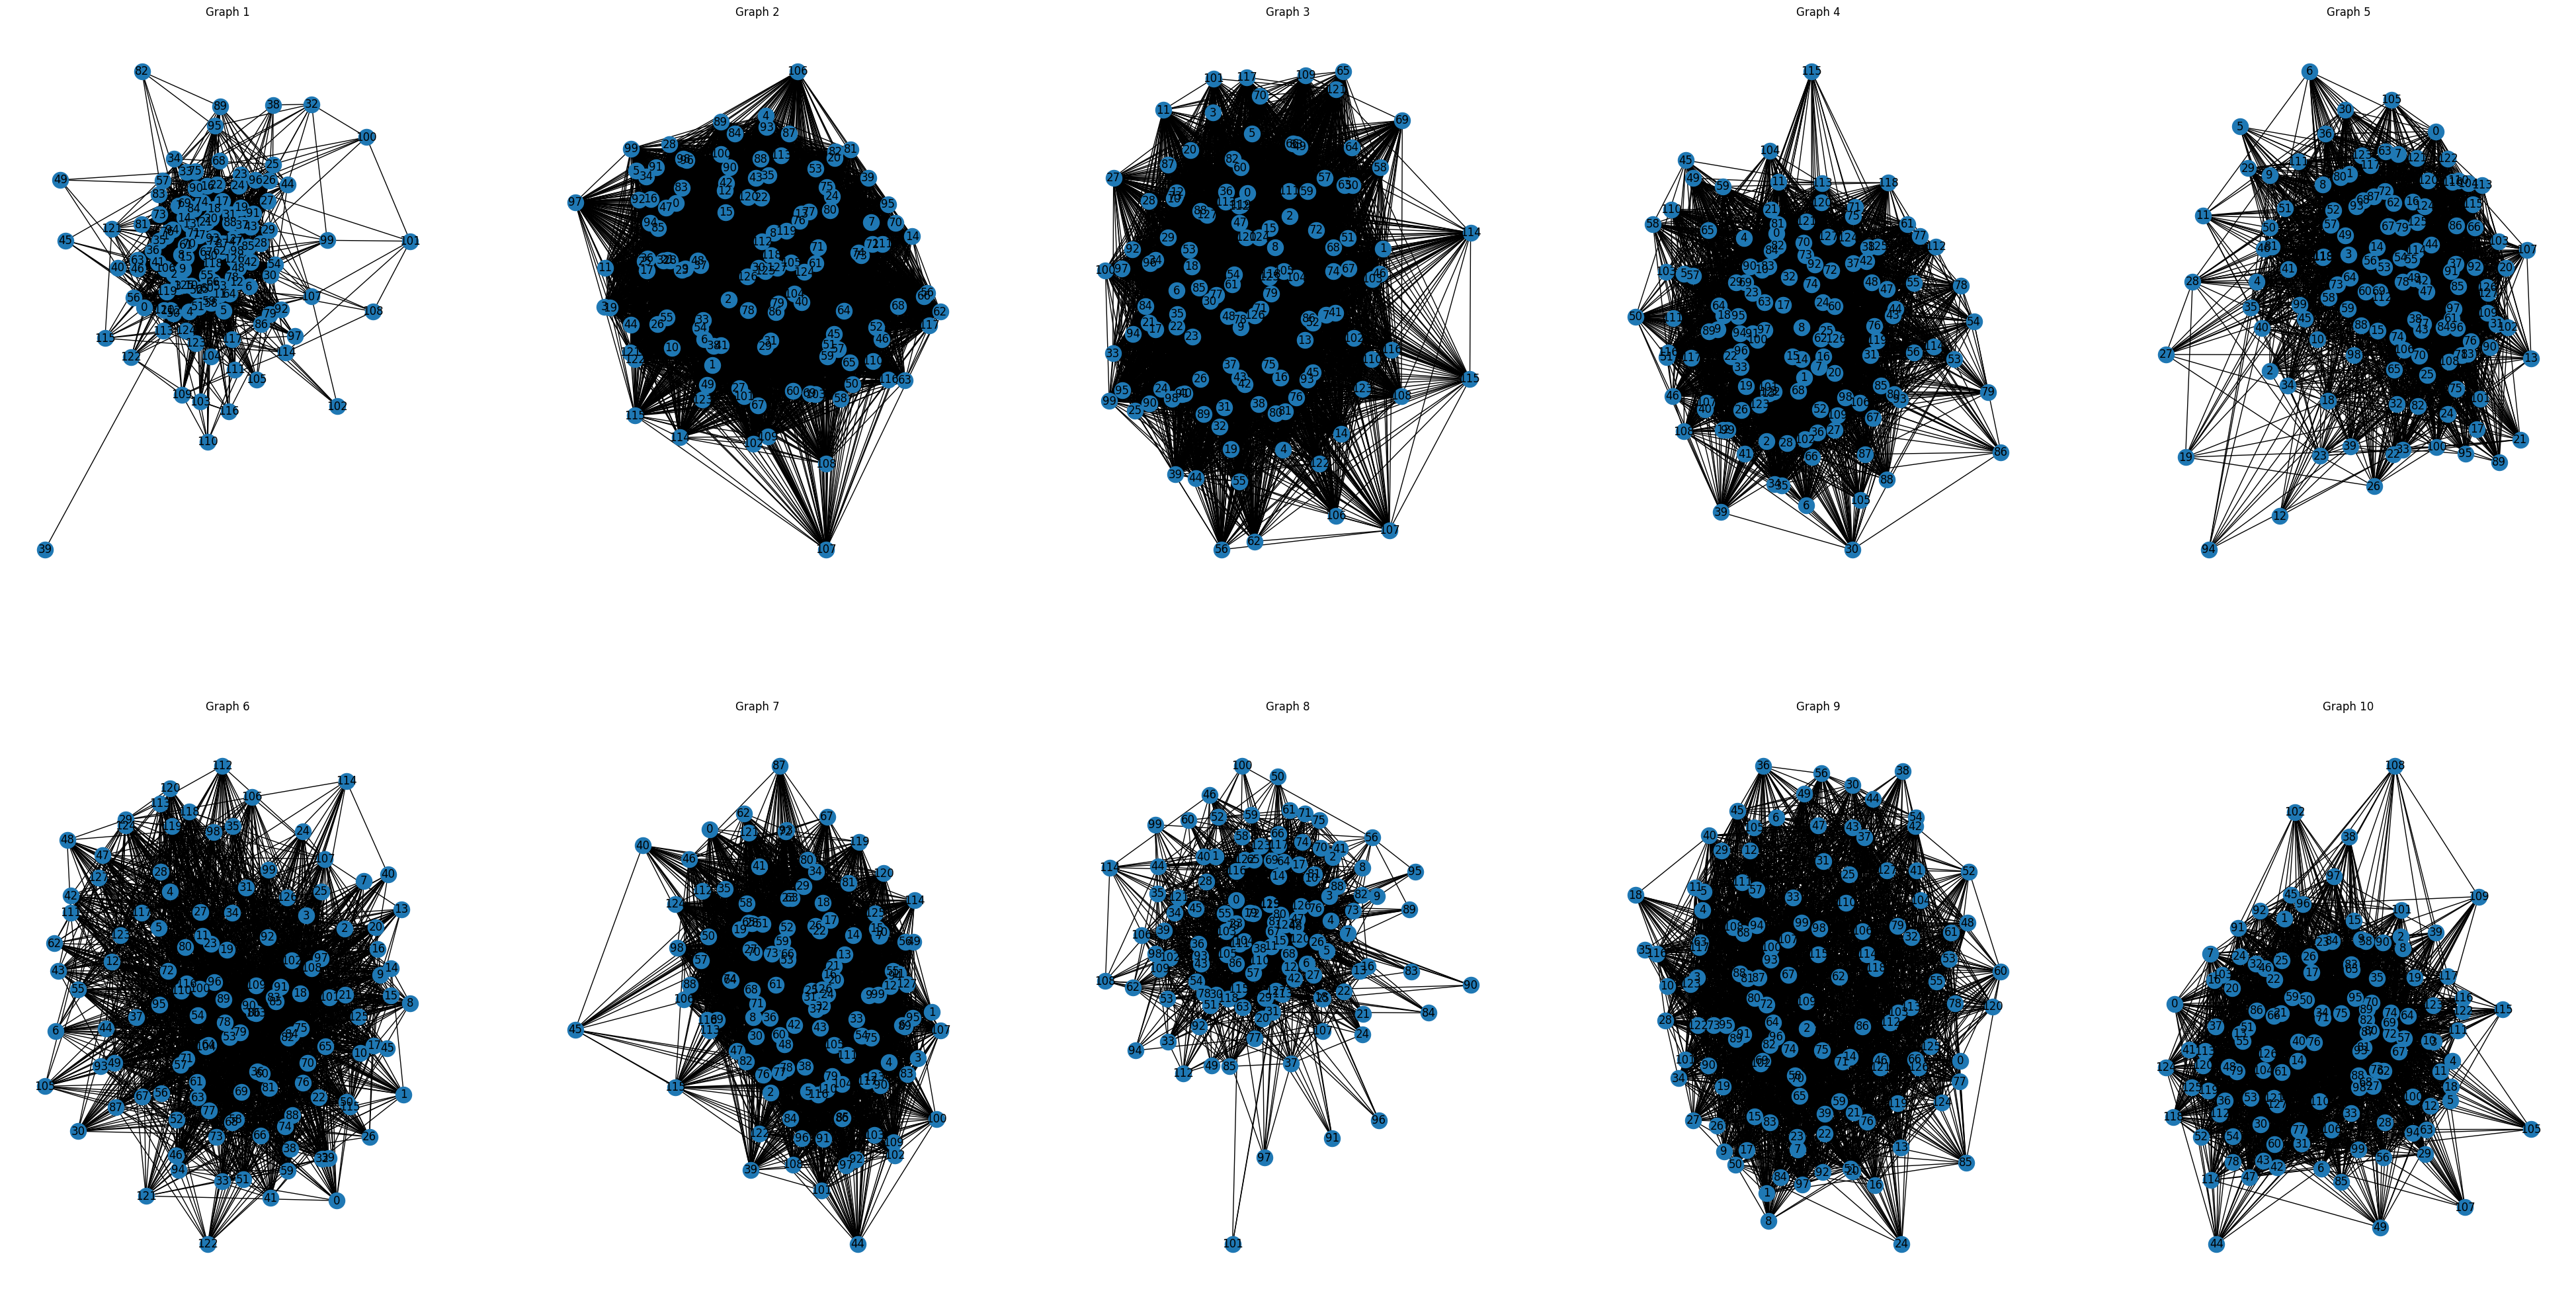

In [ ]:
import networkx as nx
import numpy as np

# Create an empty list to store all edge tuples
edge_tuples_list = []

# Generate 465 random sets of edge tuples
num_samples = 465
for i in range(num_samples):
    x = data1[i] # choose a random number of edges for each sample
#     print(len(x))
    edge_tuples = []
    for j in x:
        start_vertex = j[0]
        end_vertex = j[1]
        weight = j[2]
        edge_tuple = (start_vertex, end_vertex, weight)
        edge_tuples.append(edge_tuple)
    edge_tuples_list.append(edge_tuples)

# Create a graph for each set of edge tuples using NetworkX
graphs = []
for edge_tuples in edge_tuples_list:
    G = nx.Graph()
    for edge in edge_tuples:
        start_vertex, end_vertex, weight = edge
        G.add_edge(start_vertex, end_vertex, weight=weight)
    graphs.append(G)

# Draw the first 10 graphs using Matplotlib
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 5, figsize=(50, 25))
for i in range(10):
    ax = axs[i//5, i%5]
    nx.draw(graphs[i], ax=ax, with_labels=True)
    ax.set_title(f"Graph {i+1}")
plt.show()


In [ ]:
graph_stats = []

for i in range(0,465):

    param_list = []
    graph = graphs[i]

    # characterstic path length
    if(i != 461):
        PL = nx.average_shortest_path_length(graph)
        param_list.append(PL)
    else:
        param_list.append(0)

    # global efficiency
    GE = nx.global_efficiency(graph)
    param_list.append(GE)


    # clustering coefficient
    CC = nx.average_clustering(graph)
    param_list.append(CC)


    # transitivity
    TV = nx.transitivity(graph)
    param_list.append(TV)


    # local efficiency
    LE = nx.global_efficiency(graph)
    param_list.append(LE)

    # modularity
    communities = list(greedy_modularity_communities(graph))
    MD = nx.algorithms.community.modularity(graph, communities)
    param_list.append(MD)


    # closeness centrality
    CL = nx.closeness_centrality(graph)
    avg_CL = sum(CL.values()) / len(CL)
    param_list.append(avg_CL)

    graph_stats.append(param_list)





In [ ]:
print(len(graph_stats))

465


In [ ]:
print(len(graph_stats[0]))

7


In [ ]:
from numpy import save
save('graph_stats_dens.npy', graph_stats)

In [ ]:
# load numpy array from npy file
from numpy import load
# load array
graph_stats_dens = load(r"C:\Users\tarun\Documents\College\Mini_Proj\graph_stats_dens.npy",allow_pickle=True)
# print the array
print(len(graph_stats_dens))

465


In [ ]:
arr = np.zeros(shape=(24, 7))
# calculating avg for adventerous
for i in range(0,7):
    x = 0
    for j in range(0,20):
        x = x + graph_stats_dens[j][i]
    x = x/20
    arr[0][i] = x
print(arr)


[[1.5146429  0.74635257 0.57763622 0.55717705 0.74635257 0.1089733
  0.68060314]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.     

In [ ]:
arr = np.zeros(shape=(24, 7))
# calculating avg for adventerous
for i in range(0,7):
    x = 0
    for j in range(0,20):
        x = x + graph_stats_dens[j][i]
    arr[0][i] = x
print(arr)

[[30.29285792 14.92705144 11.55272447 11.14354097 14.92705144  2.179466
  13.61206283]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.     

In [ ]:
# calculating avg for afraid
for i in range(0,7):
    x = 0
    for j in range(452,466):
        x = x + graph_stats_dens[j][i]
    x = x/(466-452)
    arr[23][i] = x

print(arr)

[[1.5146429  0.74635257 0.57763622 0.55717705 0.74635257 0.1089733
  0.68060314]
 [1.52098089 0.7455468  0.57742665 0.56082861 0.7455468  0.10742173
  0.6766459 ]
 [1.47663313 0.76303868 0.61164408 0.59105719 0.76303868 0.09668509
  0.69623972]
 [1.46355539 0.77041408 0.62797131 0.60978765 0.77041408 0.09301772
  0.70189436]
 [1.54977083 0.73247437 0.54689612 0.53385569 0.73247437 0.1119793
  0.66522062]
 [1.49536581 0.75511264 0.56745187 0.56164516 0.75511264 0.10434449
  0.68596786]
 [1.5825094  0.71192082 0.5216841  0.49669219 0.71192082 0.13116387
  0.64577722]
 [1.47826444 0.76226214 0.58483196 0.5772141  0.76226214 0.10043504
  0.69041421]
 [1.55285433 0.72970493 0.5524265  0.53820983 0.72970493 0.12243398
  0.66427906]
 [1.39368982 0.80565256 0.66664995 0.66100105 0.80565256 0.07445819
  0.73814297]
 [1.47406496 0.76454232 0.63252608 0.61218377 0.76454232 0.09356557
  0.69534126]
 [1.55611151 0.72891387 0.55085859 0.52890584 0.72891387 0.11139009
  0.66140233]
 [1.51831194 0.744

In [ ]:
from numpy import save
save('final_avg_dens.npy', arr)

In [ ]:
# load numpy array from npy file
from numpy import load
# load array
data2 = load(r"C:\Users\tarun\Documents\College\Mini_Proj\final_avg_dens.npy",allow_pickle=True)
# print the array
print(len(data))

24


In [ ]:
print(data2[1])

[1.52098089 0.7455468  0.57742665 0.56082861 0.7455468  0.10742173
 0.6766459 ]


In [ ]:
# GROUP 1

n_amused = 14
n_happy = 17
n_delighted = 9
n_joyous = 20
total = n_amused + n_happy + n_delighted + n_joyous

weight_amused = n_amused/total
weight_happy = n_happy/total
weight_delighted = n_delighted/total
weight_joyous = n_joyous/total

features_amused = []
for i in range(0,7):
    x = 0
    for j in range(93,107):
        x = x + graph_stats_dens[j][i]
    features_amused.append(x)

features_happy = []
for i in range(0,7):
    x = 0
    for j in range(276,293):
        x = x + graph_stats_dens[j][i]
    features_happy.append(x)


features_delighted = []
for i in range(0,7):
    x = 0
    for j in range(153,162):
        x = x + graph_stats_dens[j][i]
    features_delighted.append(x)

features_joyous = []
for i in range(0,7):
    x = 0
    for j in range(319,339):
        x = x + graph_stats_dens[j][i]
    features_joyous.append(x)

# calculating the weighted average of group 1 for each feature

wavgs_group1 = []
for i in range(0,7):
    x = (features_amused[i] /total) + (features_happy[i]  /total) + (features_delighted[i]  /total) + (features_joyous[i] /total)
    wavgs_group1.append(x)

print(wavgs_group1)



[1.5278811957752019, 0.7391992252923905, 0.5692109154579856, 0.5495743910079324, 0.7391992252923905, 0.10773344386208293, 0.6725902240982499]


In [ ]:
# GROUP 2

n_adventerous = 20
n_excited = 26
n_aroused = 5
n_lust = 6
n_passionate = 7

total = n_adventerous + n_excited + n_aroused + n_lust + n_passionate

weight_adventerous = n_adventerous/total
weight_excited = n_excited/total
weight_aroused = n_aroused/total
weight_lust = n_lust/total
weight_passionate = n_passionate/total

features_adventerous = []
for i in range(0,7):
    x = 0
    for j in range(0,20):
        x = x + graph_stats_dens[j][i]
    features_adventerous.append(x)

features_excited = []
for i in range(0,7):
    x = 0
    for j in range(250,276):
        x = x + graph_stats_dens[j][i]
    features_excited.append(x)


features_aroused = []
for i in range(0,7):
    x = 0
    for j in range(148,153):
        x = x + graph_stats_dens[j][i]
    features_aroused.append(x)

features_lust = []
for i in range(0,7):
    x = 0
    for j in range(339,345):
        x = x + graph_stats_dens[j][i]
    features_lust.append(x)

features_passionate = []
for i in range(0,7):
    x = 0
    for j in range(369,376):
        x = x + graph_stats_dens[j][i]
    features_passionate.append(x)


# calculating the weighted average of group 2 for each feature

wavgs_group2 = []
for i in range(0,7):
    x = (features_adventerous[i] /total) + (features_excited[i]  /total) + (features_aroused[i]  /total) + (features_lust[i] /total) + (features_passionate[i]/total)
    wavgs_group2.append(x)

print(wavgs_group2)



[1.509927439489986, 0.748137317796214, 0.5774946847844358, 0.5596190751578878, 0.748137317796214, 0.10638284951298672, 0.6809490898992685]


In [ ]:
# GROUP 3

n_startled = 20
n_tense = 13
n_alarmed = 27


total = n_startled + n_tense + n_alarmed

weight_startled = n_startled/total
weight_tense = n_tense/total
weight_alarmed = n_alarmed/total


features_startled = []
for i in range(0,7):
    x = 0
    for j in range(421,441):
        x = x + graph_stats_dens[j][i]
    features_startled.append(x)

features_tense = []
for i in range(0,7):
    x = 0
    for j in range(452,465):
        x = x + graph_stats_dens[j][i]
    features_tense.append(x)


features_alarmed = []
for i in range(0,7):
    x = 0
    for j in range(66,93):
        x = x + graph_stats_dens[j][i]
    features_alarmed.append(x)

# calculating the weighted average of group 3 for each feature

wavgs_group3 = []
for i in range(0,7):
    x = (features_startled[i] /total) + (features_tense[i]  /total) + (features_alarmed[i] /total)
    wavgs_group3.append(x)

print(wavgs_group3)



[1.444134045744282, 0.7623298172714212, 0.6087971381929089, 0.5895879647885307, 0.7623298172714212, 0.10030541926661854, 0.6939677457374336]


In [ ]:
# GROUP 4

n_disgust = 38
n_hate = 26

total = n_disgust + n_hate

weight_disgust = n_disgust/total
weight_hate = n_hate/total


features_disgust = []
for i in range(0,7):
    x = 0
    for j in range(180,218):
        x = x + graph_stats_dens[j][i]
    features_disgust.append(x)

features_hate = []
for i in range(0,7):
    x = 0
    for j in range(293,319):
        x = x + graph_stats_dens[j][i]
    features_hate.append(x)


# calculating the weighted average of group 3 for each feature

wavgs_group4 = []
for i in range(0,7):
    x = (features_disgust[i] /total) + (features_hate[i]  /total)
    wavgs_group4.append(x)

print(wavgs_group4)



[1.4039370206208388, 0.8012548197394325, 0.6612034898519749, 0.6554850052851047, 0.8012548197394325, 0.07662100631003557, 0.7336794886868472]


In [ ]:
from numpy import save
save('grp_1_4.npy', final_group_vals)

In [ ]:
# load numpy array from npy file
from numpy import load
# load array
data3 = load(r"C:\Users\tarun\Documents\College\Mini_Proj\grp_1_4.npy",allow_pickle=True)
# print the array
print(len(data3))

4


In [ ]:
# GROUP 5

n_afraid = 46

total = n_afraid

features_afraid = []
for i in range(0,7):
    x = 0
    for j in range(20,66):
        x = x + graph_stats_dens[j][i]
    features_afraid.append(x)

# calculating the weighted average of group 5 for each feature

wavgs_group5 = []
for i in range(0,7):
    x = (features_afraid[i] /total)
    wavgs_group5.append(x)

print(wavgs_group5)

[1.520980888598164, 0.7455468022679232, 0.5774266511095413, 0.5608286077816407, 0.7455468022679232, 0.10742173336229455, 0.6766458979918671]


In [ ]:
# GROUP 6

n_distress = 22
n_angry = 40

total = n_distress + n_angry

features_distress = []
for i in range(0,7):
    x = 0
    for j in range(228,250):
        x = x + graph_stats_dens[j][i]
    features_distress.append(x)

features_angry = []
for i in range(0,7):
    x = 0
    for j in range(107,147):
        x = x + graph_stats_dens[j][i]
    features_angry.append(x)

# calculating the weighted average of group 6 for each feature

wavgs_group6 = []
for i in range(0,7):
    x = (features_distress[i] / total) + (features_angry[i] / total)
    wavgs_group6.append(x)

print(wavgs_group6)

[1.5520207466506202, 0.731210967055697, 0.5483021595779107, 0.5320992916019076, 0.731210967055697, 0.11177022081427916, 0.6638657401120495]


In [ ]:
# GROUP 7

n_miserable = 19
n_takenaback = 11
n_dissatisfied = 10
n_melancholic = 5
n_depressed = 6
n_despondent = 10

total = n_miserable + n_takenaback + n_dissatisfied + n_melancholic + n_depressed + n_despondent

features_miserable = []
for i in range(0,7):
    x = 0
    for j in range(350,369):
        x = x + graph_stats_dens[j][i]
    features_miserable.append(x)

features_takenaback = []
for i in range(0,7):
    x = 0
    for j in range(441,452):
        x = x + graph_stats_dens[j][i]
    features_takenaback.append(x)

features_dissatisfied = []
for i in range(0,7):
    x = 0
    for j in range(218,228):
        x = x + graph_stats_dens[j][i]
    features_dissatisfied.append(x)

features_melancholic = []
for i in range(0,7):
    x = 0
    for j in range(345,350):
        x = x + graph_stats_dens[j][i]
    features_melancholic.append(x)

features_depressed = []
for i in range(0,7):
    x = 0
    for j in range(164,170):
        x = x + graph_stats_dens[j][i]
    features_depressed.append(x)

features_despondent = []
for i in range(0,7):
    x = 0
    for j in range(170,180):
        x = x + graph_stats_dens[j][i]
    features_despondent.append(x)


# calculating the weighted average of group 7 for each feature

wavgs_group7 = []
for i in range(0,7):
    x = (features_miserable[i] / total) + (features_takenaback[i] / total) + (features_dissatisfied[i] / total) + (features_melancholic[i] / total) + (features_depressed[i] / total) + (features_despondent[i] / total)
    wavgs_group7.append(x)

print(wavgs_group7)

[1.5165835714969127, 0.7481848325109828, 0.5948035728818329, 0.5784404959706924, 0.7481848325109828, 0.10322003311507225, 0.68110359743017]


In [ ]:
# GROUP 8

n_sad = 10

total = n_sad

features_sad =  []
for i in range(0,7):
    x = 0
    for j in range(170,180):
        x = x + graph_stats_dens[j][i]
    features_sad.append(x)

# calculating the weighted average of group 8 for each feature

wavgs_group8 = []
for i in range(0,7):
    x = (features_sad[i] /total)
    wavgs_group8.append(x)

print(wavgs_group8)

[1.5528543307086615, 0.729704929461944, 0.5524265006055302, 0.53820982995818, 0.729704929461944, 0.12243397612999149, 0.6642790576247323]
